In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


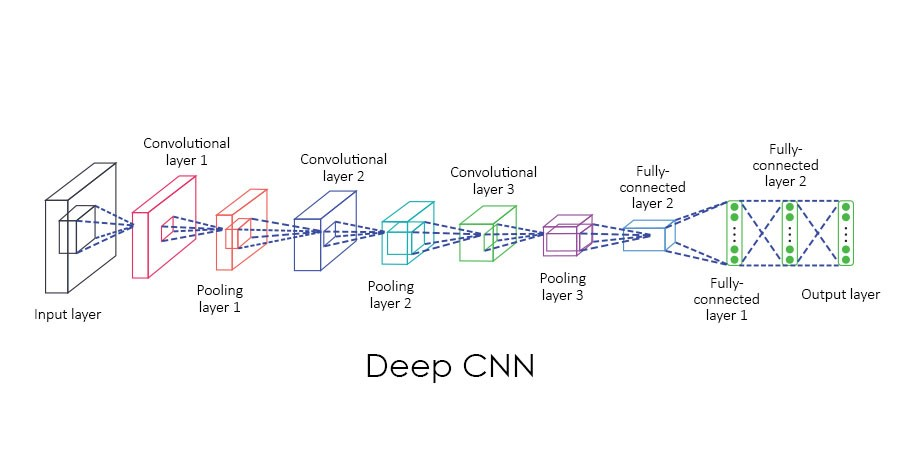

In [5]:
from IPython.display import Image
Image('E.jpg')

In [8]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    returntf.Variable(init_random_dist)

In [10]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    returntf.Variable(init_bias_vals)

In [21]:
def conv2d(x, W):

    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [26]:
#CREATION OF POOLING LAYER:

In [25]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [27]:
#CREATION OF CONVOLUTIONAL LAYER:

In [29]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    returntf.nn.relu(conv2d(input_x, W) + b)

In [30]:
#CREATION OF FULLY CONNECTED LAYER:

In [31]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    returntf.matmul(input_layer, W) + b

In [32]:
#This is just a normal fully connected layer of the input layer. It’s input times 
#the weights Plus the buys strips.(wx+b). So now we have two functions: one creates 
#a convolutional layer and the other creates a normal fully connected layer.

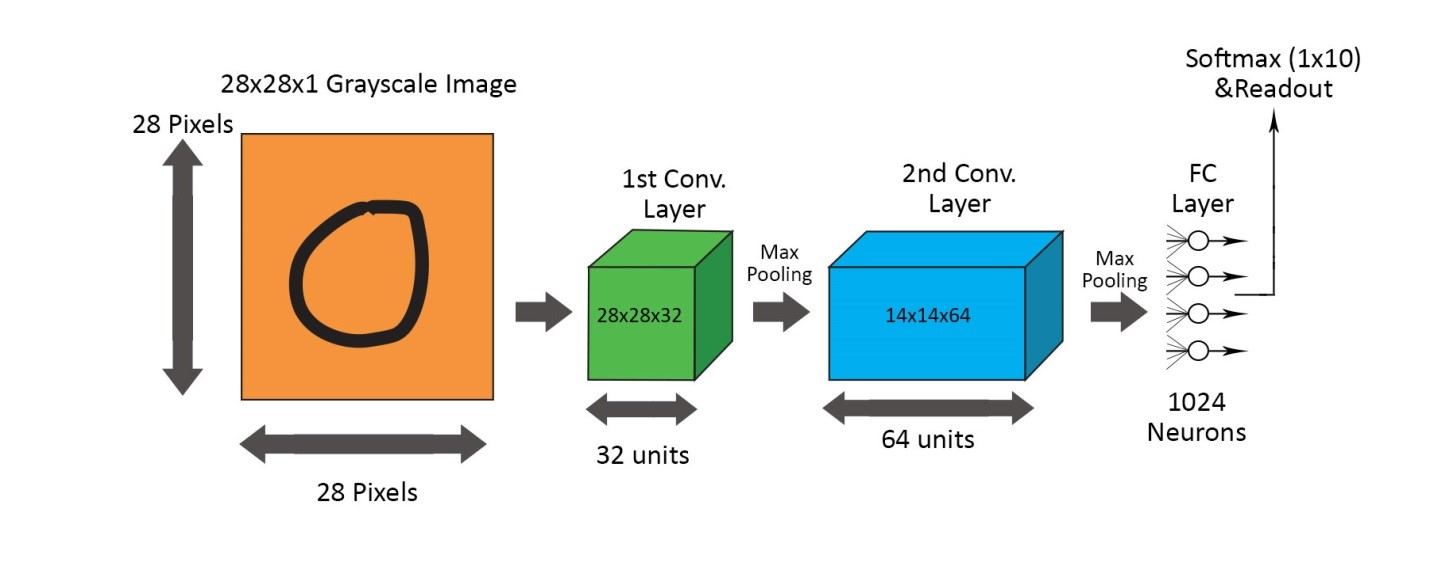

In [33]:
from IPython.display import Image
Image('F.jpg')

In [34]:
#CREATION OF PLACEHOLDERS:
#Placeholders are used to store input variables before actually supplying them to the CNN. 
#The syntax to create a placeholder in tensorflow is as below :

In [36]:
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
#full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [37]:
#DEFINING MULTIPLE CNN LAYERS ALONG WITH CORRESPONDING MAX POOLING LAYERS:

In [38]:
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])

convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])

convo_2_pooling = max_pool_2by2(convo_2)

# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7

# 64 then just comes from the output of the previous Convolution

convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])

full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024)) #adding a fully connected layer at the end.

NameError: name 'x_image' is not defined